In [1]:
import cv2
from tqdm import tqdm

In [2]:
class Area:
    def __init__(self, left, right, up, down, val):
        self.left = left
        self.right = right
        self.up = up
        self.down = down
        self.val = val

    def __cmp__(self, other):
        if self.val < other.val:
            return -1
        elif self.val == other.val:
            return 0
        else:
            return 1

    def __lt__(self, other):  
        if self.val < other.val:
            return True
        else:
            return False
        
    def __str__(self):
        return "Area's value is " + str(self.val)

In [3]:
def elements_gt_threshold(matrix, threshold):
    count = 0
    h, w = matrix.shape
    for i in range(h):
        for j in range(w):
            if matrix[i, j] > threshold:
                count += 1
    return count

In [52]:
threshold = 0.1
img = cv2.imread('90_4_down.jpg', 0)
mid_hw = [(16, 16)]
objects_count = 0
h, w = img.shape

result_list = []
res_dict = {}
for i in tqdm(range(h)):
    for j in range(w):
        # pool = Pool(processes=3)
        for hw in mid_hw:
            rect_h, rect_w = hw
            tal = rect_h * rect_w * threshold
            left = max(j - int(rect_w/2), 0)
            right = min(j + int(rect_w/2), w)
            up = max(i - int(rect_h / 2), 0)
            down = min(i + int(rect_h / 2), h)
            result = elements_gt_threshold(img[up:down, left:right], 200)
            
            if result > tal:
                objects_count += 1
                area = Area(left, right, up, down, result/(rect_h * rect_w))
                result_list.append(area)

100%|██████████| 168/168 [00:19<00:00,  8.45it/s]


In [38]:
threshold = 0.1
img = cv2.imread('90_4_down.jpg', 0)
mid_hw = [(32, 32)]
objects_count = 0
h, w = img.shape

result_list = []
res_dict = {}
for i in tqdm(range(h)):
    for j in range(w):
        # pool = Pool(processes=3)
        for hw in mid_hw:
            rect_h, rect_w = hw
            tal = rect_h * rect_w * threshold
            left = max(j - int(rect_w/2), 0)
            right = min(j + int(rect_w/2), w)
            up = max(i - int(rect_h / 2), 0)
            down = min(i + int(rect_h / 2), h)
            result = elements_gt_threshold(img[up:down, left:right], 200)
            
            if result > tal:
                objects_count += 1
                area = Area(left, right, up, down, result/(rect_h * rect_w))
                result_list.append(area)

100%|██████████| 168/168 [01:13<00:00,  3.59it/s]


In [43]:
threshold = 0.1
img = cv2.imread('90_4_down.jpg', 0)
mid_hw = [(51, 76)]
objects_count = 0
h, w = img.shape

result_list = []
res_dict = {}
for i in tqdm(range(h)):
    for j in range(w):
        # pool = Pool(processes=3)
        for hw in mid_hw:
            rect_h, rect_w = hw
            tal = rect_h * rect_w * threshold
            left = max(j - int(rect_w/2), 0)
            right = min(j + int(rect_w/2), w)
            up = max(i - int(rect_h / 2), 0)
            down = min(i + int(rect_h / 2), h)
            result = elements_gt_threshold(img[up:down, left:right], 200)
            
            if result > tal:
                objects_count += 1
                area = Area(left, right, up, down, result/(rect_h * rect_w))
                result_list.append(area)

100%|██████████| 168/168 [04:08<00:00,  1.10it/s]


In [39]:
result_list.sort(reverse=True)

In [40]:
mid_list = result_list.copy()

In [53]:
small_list = result_list.copy()

In [44]:
large_list = result_list.copy()

In [45]:
print(len(mid_list))
print(len(small_list))
print(len(large_list))

3579
3301
1625


In [54]:
img = cv2.imread('90_4_down.jpg', 0)
for i in range(len(small_list)): 
    pos = (small_list[i].left, small_list[i].right, small_list[i].up, small_list[i].down)
    cv2.rectangle(img, (pos[0], pos[2]), (pos[1], pos[3]), (155), 1)

In [50]:
img = cv2.imread('90_4_down.jpg', 0)
for i in range(len(mid_list)): 
    pos = (mid_list[i].left, mid_list[i].right, mid_list[i].up, mid_list[i].down)
    cv2.rectangle(img, (pos[0], pos[2]), (pos[1], pos[3]), (155), 1)

In [72]:
img = cv2.imread('90_4_down.jpg', 0)
for i in range(len(large_list)): 
    pos = (large_list[i].left, large_list[i].right, large_list[i].up, large_list[i].down)
    cv2.rectangle(img, (pos[0], pos[2]), (pos[1], pos[3]), (155), 1)

In [71]:
img = cv2.imread('90_4_down.jpg', 0)
pos_mid = res_dict[keys[0]]
pos_right = res_dict[keys[200]]
cv2.rectangle(img, (pos_mid[0], pos_mid[2]), (pos_mid[1], pos_mid[3]), (155), 1)
cv2.rectangle(img, (pos_right[0], pos_right[2]), (pos_right[1], pos_right[3]), (155), 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt

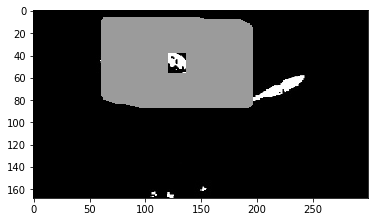

In [73]:
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [48]:
cv2.imwrite('90_4_largebox.jpg', img)

True

In [78]:
img = cv2.imread('90_4_down.jpg', 0)
small_center = (70, 50)
mid_center = (220, 70)
pos_mid = (95, 171, 15, 65)
pos_left = (62, 78, 42, 58)
pos_right = (188, 252, 38, 102)
cv2.rectangle(img, (pos_mid[0], pos_mid[2]), (pos_mid[1], pos_mid[3]), (155), 1)
cv2.rectangle(img, (pos_left[0], pos_left[2]), (pos_left[1], pos_left[3]), (155), 1)
cv2.rectangle(img, (pos_right[0], pos_right[2]), (pos_right[1], pos_right[3]), (155), 1)
cv2.imwrite('90_4_box_res.jpg', img)

True

In [81]:
img = cv2.imread('uw/uw1/241.jpg')

In [82]:
img.shape

(720, 1280, 3)

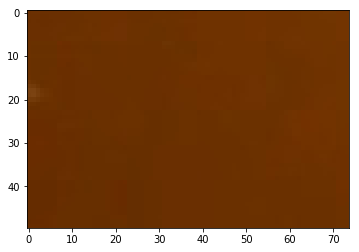

In [83]:
crop_mid = img[pos_mid[2]: pos_mid[3], pos_mid[0]:pos_mid[1]]
plt.figure()
plt.imshow(crop_mid)
plt.show()

In [84]:
pos_mid

(105, 179, 25, 75)

In [69]:
mid_list.sort(reverse=True)
print(mid_list[0].left,mid_list[0].right,mid_list[0].up, mid_list[0].down)
print(mid_list[0].val)

112 144 29 61
0.3681640625


In [70]:
small_list.sort(reverse=True)
print(small_list[0].left,small_list[0].right,small_list[0].up, small_list[0].down)
print(small_list[0].val)

112 128 29 45
0.6953125


In [71]:
large_list.sort(reverse=True)
print(large_list[0].left,large_list[0].right,large_list[0].up, large_list[0].down)
print(large_list[0].val)

95 171 15 65
0.13596491228070176
